In [3]:
import os
import glob
import pandas as pd
import re

import matplotlib.pyplot as plt

import scipy as sp
import scipy.stats
import numpy as np

extension = 'csv'
file_names = [i for i in glob.glob('*.csv')]
run_time = pd.DataFrame(index=("PCA","MDS","Isomap","Spectral embedding","LLE","HLLE","LTSA","t-SNE"))

for file_name in file_names:
    p = re.compile('(.*)-ctime.csv')
    student_name = p.findall(file_name)[0]
    student_run_time = pd.read_csv(file_name, header=None)
    student_run_time.index = run_time.index
    run_time[[student_name]] = student_run_time
run_time

,michal_heydel,201742430,201652937,201610855,chloe0730000,Davidson,201703272,beck
PCA,0.004010,0.011010,0.025560,0.027148,0.018685,0.000000,0.004012,0.006003
MDS,7.935112,9.366406,2.467452,9.739179,11.238397,0.000000,6.455633,45.949538
Isomap,1.703532,0.000000,1.141646,1.500038,2.330249,0.000045,1.026571,0.569402
Spectral embedding,0.365788,9.366406,1.141646,0.330618,0.417012,0.000000,0.316852,0.633035
LLE,0.511360,0.515629,0.454503,0.678501,0.900331,3.103321,0.652437,0.429286
HLLE,0.881344,0.968763,0.804857,1.165363,1.224368,2.002145,1.052650,0.860610
LTSA,0.771050,0.695246,0.688188,0.864169,0.815853,1.533434,1.117455,0.901099
t-SNE,9.426134,8.091705,4.947588,7.505599,6.716122,11.660785,5.231333,5.304756


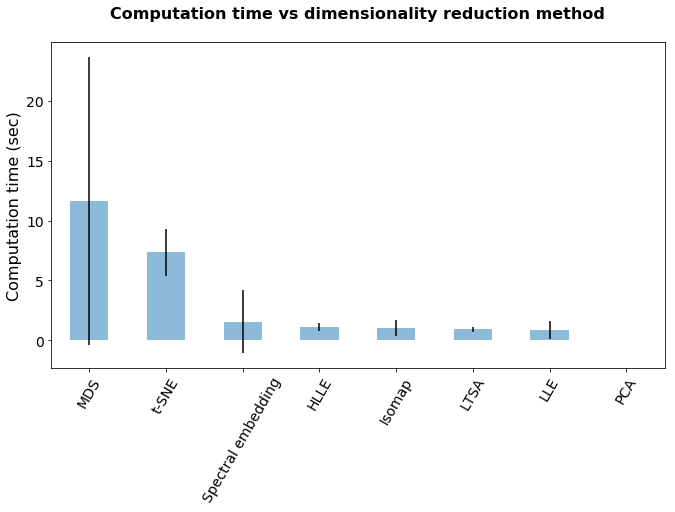

In [4]:
#gp = df4.groupby(level=('letter', 'word'))
run_time_stat = pd.DataFrame(index=run_time.index)
run_time_stat['mean'] = run_time.mean(axis=1)
run_time_stat['sd'] = run_time.std(axis=1)
confidence = 0.95
run_time_stat['cv'] = pd.DataFrame(run_time.std(axis=1) * sp.stats.t._ppf((1+confidence)/2., run_time.shape[1]-1)) / np.sqrt(run_time.shape[1])
run_time_stat = run_time_stat.sort_values(by=['mean'],ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(11,6))
run_time_stat['mean'].plot.bar(yerr=run_time_stat["cv"], ax=ax, alpha=0.5);
plt.ylabel("Computation time (sec)", fontsize=16)
plt.title("Computation time vs dimensionality reduction method\n", fontsize=16, fontweight='bold')
plt.tick_params(labelsize=14)
plt.xticks(rotation=60)
plt.show()